## Deep Learning Bootcamp

Predict if a bank note is genuine or not

**Loading libraries**

In [ ]:
import numpy as np                # for matrix computations
import pandas as pd               # for loading CSV files
import matplotlib.pyplot as plt   # for data visualization

**Training Dataset**

In [ ]:
# Load the training data
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

**Data Description**

1. **VWTI:** Variance of Wavelet Transformed Image
2. **SWTI:** Skewness of Wavelet Transformed Image
3. **CWTI:** Curtosis of Wavelet Transformed Image
4. **EI:** Entropy of Image
5. **Class:** Class (1: genuine, 0: forged)

In [ ]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [ ]:
bank_note_data.shape    # gives shape of the dataframe (rows x columns)

(1096, 5)

**Test Dataset**



In [ ]:
# Load test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [ ]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    275 non-null    float64
 1   SWTI    275 non-null    float64
 2   CWTI    275 non-null    float64
 3   EI      275 non-null    float64
dtypes: float64(4)
memory usage: 8.7 KB


**Separating Input and Target Variable**

In [ ]:
X_train = bank_note_data.drop('Class', axis = 1)    # input variables from training data
y_train = bank_note_data['Class']                   # target variable from training data

In [ ]:
# Check the number of input features
X_train.shape[1]

4

**Libraries for Building Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

**Model Creation**

*    Sigmoid activation function will be in the final layer of neural network, since this is a binary classification problem.

*    Sigmoid function will give an output between 0 and 1. 

*    Will create a sequential model and add layers until one at a time until network architecture is fine.

**Model Architecture**

**input** = the # of feature in X_train = 4

*     the # of neurons in first dense layer = 16

*     the # of neurons in the second dense layer = 8

*     the # of neurons in the third dense layer = 4

*     the # of neurons in the output layer = 1

In [ ]:
# Building the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

The above codes creates a neural network with 4 layers.

**Model Compilation**



In [ ]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(0.001)      # set learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])

* The loss function used is **binary_crossentropy**. Mostly used in binary classification problems as the optimizer of choice. It gives the output in the form of probability.
* The **RMSprop** is used as the optimizer.
* The **learning rate** is 0.001. It can be any values depending on the optimal learning rate for the model which can be retrieved using trial and error.
* Metrics used to evaluate the model is **accuracy**. It calculates how often the calculation made by the model is correct.

In [ ]:
# printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


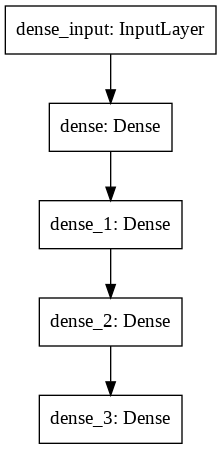

In [ ]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

**Model Training**

* **validation_split** is part of the training data.

Saving the trained model to a variable called **history**. 

This object keeps all loss values and other metric values in memory so that they can be used for visualizations.

The history object is the output of the fit operation.

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size =10, verbose = 1)

Epoch 1/200
88/88 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.8573 - val_loss: 0.3255 - val_accuracy: 0.9227
Epoch 2/200
88/88 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9612 - val_loss: 0.1454 - val_accuracy: 0.9955
Epoch 3/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9886 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 4/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9897 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 5/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9989 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 6/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/200
8

**Model Evaluation**



In [ ]:
predictions = model.predict(test_data)

In [ ]:
predictions = [int(np.round(x)) for x in predictions]

In [ ]:
tf = tf.constant(predictions)

In [ ]:
tf

<tf.Tensor: shape=(275,), dtype=int32, numpy=
array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int32)>

In [ ]:
results = pd.DataFrame(predictions)
results.columns =['predictions']

In [ ]:
from google.colab import files
results.to_csv('Predictions_DL_Assignment01_Ronquillo.csv')

In [ ]:
print(results)

     predictions
0              1
1              1
2              0
3              0
4              0
..           ...
270            1
271            0
272            0
273            0
274            0

[275 rows x 1 columns]
